# <center> **Mini-Project for Machine Learning**

<center>
 <div style="background-color:#C0F235; padding:10px; border-radius:6px;">
  <h2><strong>Credit Card Fraud Classifier with Supervised ML Models</strong></h2>
</div>   
</center>

### Table of contents:


1. [Objective](#Objective:)
2. [Load Libraries](#Load-libraries:)  
3. [Load The Dataset](#Load-the-dataset:)  
4. [Exploratory data analysis (EDA):](#Exploratory-Data-Analysis-(EDA):)  
5. [Data Preprocessing:](#Data-Preprocessing:)  
6. [Model Training & Evaluation:](#Model-Training-&-Evaluation:)  
   - Logistic Regression  
   - Decision Tree  
   - Random Forest  
   - MLP 
7. [Model Comparison:](#Model-Comparison:)
8. [Conclusion](#Conclusion:)


### Objective:

Credit card fraud is a major challenge for banks and financial institutions, causing significant financial losses every year. Detecting fraudulent transactions is difficult due to the **highly imbalanced nature of the data**, where legitimate transactions vastly outnumber fraudulent ones.  
This notebook demonstrates how to construct a **binary classifier** to detect fraudulent credit card transactions using different **supervised** machine learning models.


Dataset used: [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)


### Load libraries:

In [137]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Handling imbalance
from imblearn.over_sampling import SMOTE


### Load the dataset:

In [108]:
# Load the dataset
df_original = pd.read_csv('creditcard.csv')

In [109]:
# Create a working copy of the dataset to preserve the original data
df = df_original

In [110]:
print("Dataset Shape:", df.shape)

Dataset Shape: (284807, 31)


Based on the `df.shape` output, the dataset contains **284,807 samples** and **30 features**. 

In [111]:
print("\nFirst 5 rows:")
df.head()


First 5 rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Exploratory Data Analysis (EDA):

<h4 style="color: darkgreen;">1. The Structure and Datatypes:</h4>

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

##### Based on the `df.info()` output, we can notice that:
* There are no missing values (non-null count is 284,807 for all columns).
* All features are numerical (`float64`), except for the `Class` column which is an integer (`int64`).
* The dataframe utilizes approximately 67.4 MB of memory.

<h4 style="color: darkgreen;">2. Understanding the Features</h4>

The dataset contains anonymized transaction information.To protect user privacy, most original features have been transformed using <strong>Principal Component Analysis (PCA)</strong>:

<ul>
  <li><strong>V1 to V28</strong>: These are the 28 principal components derived from the PCA transformation. They summarize the important patterns in the original features, though they do not have direct real-world interpretations.</li>
  <li><strong>Time</strong>: The number of seconds elapsed since the first recorded transaction in the dataset. This can help identify time-based patterns in transaction behavior.</li>
  <li><strong>Amount</strong>: The monetary value of the transaction in euros. This is an important feature for cost-sensitive analysis and can help detect unusually large or suspicious transactions.</li>
  <li><strong>Class</strong>: The target variable indicating whether a transaction is legitimate or fraudulent:
    <ul>
      <li>0 → Legitimate transaction</li>
      <li>1 → Fraudulent transaction</li>
    </ul>
  </li>
</ul>


<h4 style="color: darkgreen;">3. Checking Missing Values:</h4>

In [113]:
print(df.isnull().sum().sum(), "total missing values")

0 total missing values


<h4 style="color: darkgreen;">4. Statistical Summary:</h4>

In [114]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<h4 style="color: darkgreen;">5. Class Distribution:</h4>

We first examine the distribution of the target variable `Class` to understand the level of imbalance:

In [115]:
fraud_count = df['Class'].value_counts()
fraud_percentage = df['Class'].value_counts(normalize=True) * 100

print(f"Legitimate Transactions (0): {fraud_count[0]:,} ({fraud_percentage[0]:.3f}%)")
print(f"Fraudulent Transactions (1): {fraud_count[1]:,} ({fraud_percentage[1]:.3f}%)")
print(f"\nImbalance Ratio: {fraud_count[0]/fraud_count[1]:.1f}:1")

Legitimate Transactions (0): 284,315 (99.827%)
Fraudulent Transactions (1): 492 (0.173%)

Imbalance Ratio: 577.9:1


- **fraud_count** counts the number of legitimate (`0`) and fraudulent (`1`) transactions.  
- **fraud_percentage** calculates the percentage of each class in the dataset.  
- The **Imbalance Ratio** shows how many legitimate transactions exist for every fraudulent one.

⚠️ Observation: The dataset exhibits **extreme class imbalance**, with far fewer fraudulent transactions than legitimate ones. Special techniques (e.g., SMOTE, class weighting) will be needed to train effective models.

<h4 style="color: darkgreen;">6. Correlation Heatmap of Features:</h4>

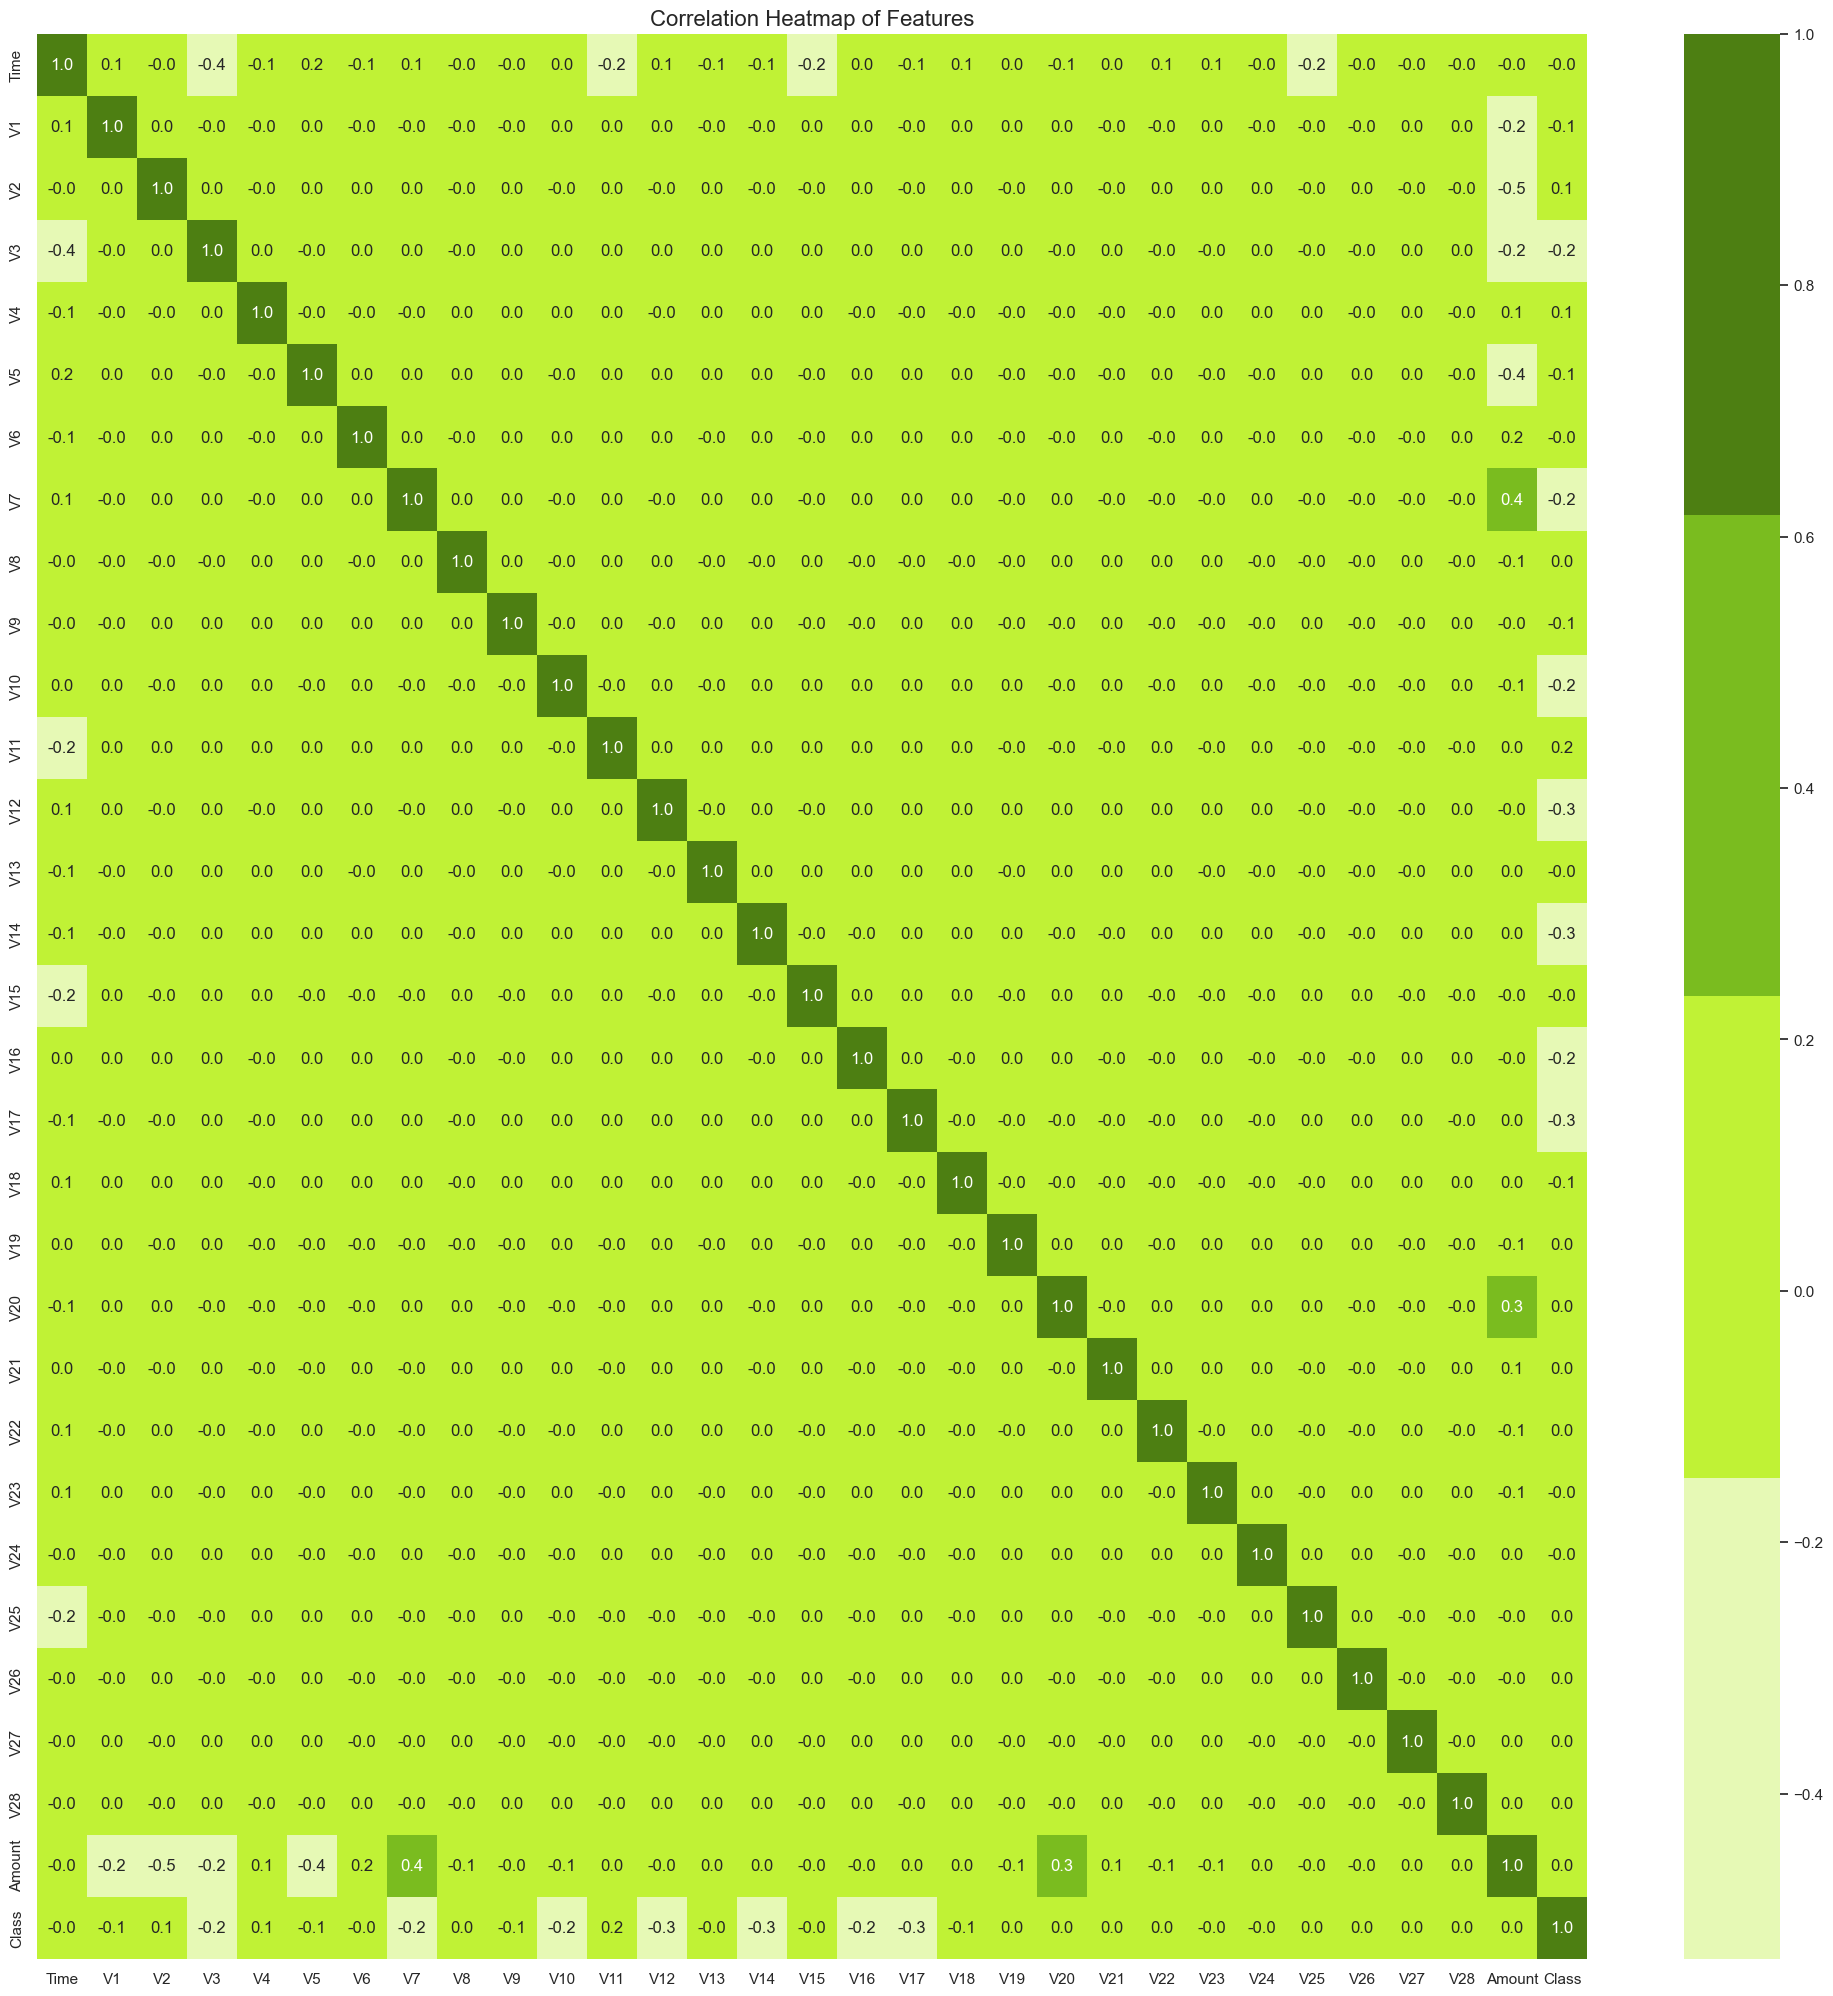

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
corr_matrix = df.corr()

palette = sns.color_palette(["#E6F9B5", "#C0F235", "#7ABC1F", "#4D7F12"])

plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix, cmap=palette, annot=True, fmt="0.1f", cbar=True)
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.show()

#### From the heatmap of the dataset, we observe the following:

- The PCA-transformed features **V1 to V28** generally have **weak correlations among themselves**, confirming that the dimensionality reduction successfully decorrelated the original features.  
- The **Amount** feature shows a **slightly higher positive correlation** with the target `Class` compared to other features, suggesting that larger transaction amounts are **marginally more likely to be fraudulent**.  
- The **Time** feature has **minimal correlation with `Class`**, indicating that the transaction timestamp alone is **not a strong predictor of fraud**.  
- Some features, such as **V17, V14, and V12**, display **moderate correlations with each other**, reflecting patterns captured during PCA.  

Overall, the heatmap confirms that **no single feature dominates fraud prediction**.


<h4 style="color: darkgreen;">7. Outliers:</h4>

For our dataset, We don't need **to remove outliers** because fraudulent transactions often manifest as extreme values, which are exactly the data points we aim to detect. Removing them could potentially discard critical information needed for effective fraud detection.


### Data Preprocessing:

<h4 style="color: darkgreen;">1. Train/Test split:</h4>

- We split the dataset into **training** and **test** sets (80/20).  
- Using **stratification** ensures the **fraudulent to legitimate ratio** remains roughly the same in both sets.  
- This is crucial for **imbalanced datasets** like credit card fraud, so that the model sees a representative number of fraud cases during training and evaluation.  

In [117]:
# Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [118]:
# Stratified split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:")
print(f"  Shape: {X_train.shape}")
print(f"  Fraud cases: {y_train.sum()} ({y_train.sum()/len(y_train)*100:.3f}%)")

print(f"\nTest set:")
print(f"  Shape: {X_test.shape}")
print(f"  Fraud cases: {y_test.sum()} ({y_test.sum()/len(y_test)*100:.3f}%)")

Training set:
  Shape: (227845, 30)
  Fraud cases: 394 (0.173%)

Test set:
  Shape: (56962, 30)
  Fraud cases: 98 (0.172%)



- The printed output shows the **shape of each set** and the **number/percentage of fraud cases**.  
- The stratified split ensures that **fraud cases are fairly distributed between the training and test sets**. This preserves the original class imbalance in both subsets, allowing the model to learn from representative data and enabling a reliable and unbiased evaluation of its performance.


<h4 style="color: darkgreen;">2. Feature Scaling:</h4>

Features `V1-V28` are already standardized due to **PCA** transformation.   
We only need to scale `Time` and `Amount` which are on different scales.   
The scaler is **fitted only on the training data** to avoid data leakage and then applied to the test set using the same transformation.

In [119]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# fit on training data
X_train[['Amount', 'Time']] = scaler.fit_transform(X_train[['Amount', 'Time']])

# verifyy scaling
X_train[['Amount', 'Time']].head()

,Amount,Time
265518,-0.204315,0.905774
180305,-0.264579,0.465984
42664,2.130828,-0.512286
198723,-0.221294,0.561678
82325,0.892136,-0.298886


**Important:** The scaler is fitted only on the training data to prevent data leakage. This ensures that no information from the test set is used during training, allowing for a fair and unbiased evaluation of the model.

In [120]:
# Transform test data using the same scaler
X_test[['Amount', 'Time']] = scaler.transform(X_test[['Amount', 'Time']])

The same scaling transformation learned from the training data is applied to the test set to ensure consistency and prevent data leakage. This guarantees that the model evaluates unseen data under the same conditions used during training.


<h4 style="color: darkgreen;">3. Handling Class Imbalance:</h4>

Handling class imbalance is crucial for credit card fraud detection because fraud cases are extremely rare (~0.172%).  
If we train directly on imbalanced data, models may just predict “legitimate” all the time and still get high accuracy, but that’s useless.

To prevent the model from ignoring frauds, we apply **SMOTE : Synthetic Minority Over Sampling Technique**.  

**How it works:**  
SMOTE helps create new fraud examples to balance the dataset. It does this by:  
- Finding the **nearest neighbors** for each existing fraud case  
- Generating **new synthetic samples** along the lines connecting these neighbors  
- Making the dataset more balanced, so legitimate and fraudulent transactions are closer to a **50:50 ratio**  

**Why apply after splitting:**  
- If we applied SMOTE **before splitting**, some synthetic fraud examples could end up in the test set.  
- This would give the model an unfair advantage and make the evaluation **look better than it really is**, because the test data wouldn’t be completely unseen.

In [121]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)

# Apply SMOTE only on training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Print new class distribution
print("SMOTE Resampled Training Data:")
print(f"Legitimate (0): {(y_train_smote == 0).sum():,}")
print(f"Fraud (1): {(y_train_smote == 1).sum():,}")
print(f"New Ratio: {(y_train_smote == 0).sum() / (y_train_smote == 1).sum():.1f}:1")

print(f"\nCreated {(y_train_smote == 1).sum() - (y_train == 1).sum():,} synthetic fraud examples")

SMOTE Resampled Training Data:
Legitimate (0): 227,451
Fraud (1): 227,451
New Ratio: 1.0:1

Created 227,057 synthetic fraud examples


#### Calss Distribution Before SMOTE

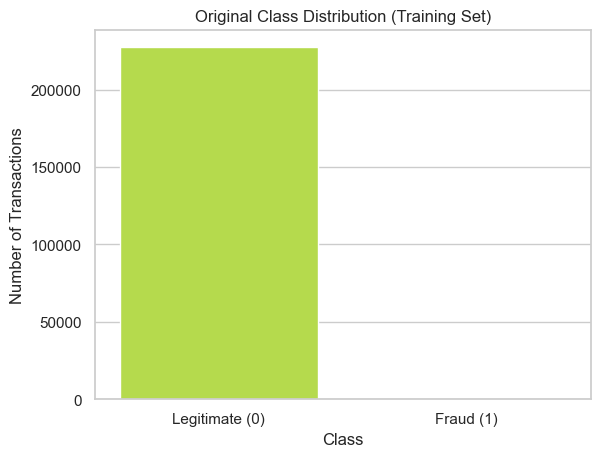

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

#Class Distribution Before SMOTE
sns.countplot(x=y_train, color="#C0F235")
plt.title("Original Class Distribution (Training Set)")
plt.xlabel("Class")
plt.ylabel("Number of Transactions")
plt.xticks([0, 1], ['Legitimate (0)', 'Fraud (1)'])
plt.show()


#### Class Distribution After SMOTE

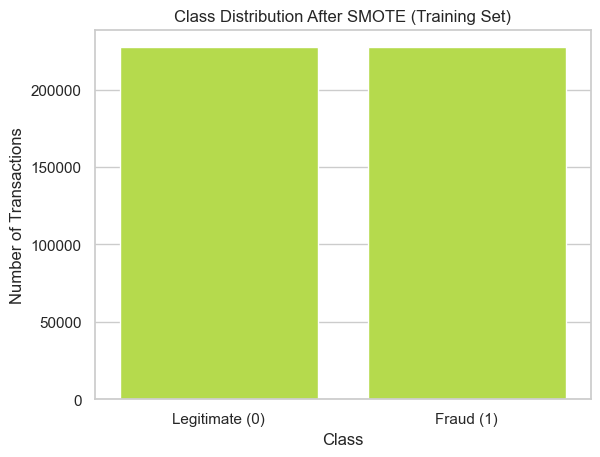

In [141]:
### Class Distribution After SMOTE
sns.countplot(x=y_train_smote,  color="#C0F235")
plt.title("Class Distribution After SMOTE (Training Set)")
plt.xlabel("Class")
plt.ylabel("Number of Transactions")
plt.xticks([0, 1], ['Legitimate (0)', 'Fraud (1)'])
plt.show()


### Model Training & Evaluation:

We train several machine learning models using the **SMOTE-resampled training set** to classify transactions as **legitimate (0)** or **fraudulent (1)**.  

##### Models to test:  
- Logistic Regression
- Decision Tree  
- Random Forest  
- MLPClassifier

<h4 style="color: darkgreen;">1. Logistic Regression:</h4>

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on SMOTE-resampled training data
logreg.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = logreg.predict(X_test)


#### Confusion Matrix:

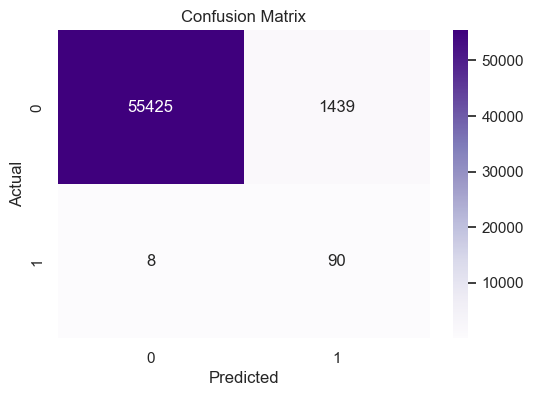

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### From the confusion matrix, we can observe that:

- The model correctly identifies a **large number of legitimate transactions** (True Negatives).  
- It also detects a **significant portion of fraudulent transactions** (True Positives), but some fraud cases are still misclassified (False Negatives).  
- There are **few False Positives**, meaning the model rarely flags legitimate transactions as fraud.  

Overall, the logistic regression model performs reasonably well in detecting fraud, but due to the rarity of fraudulent transactions, some fraud cases may still go undetected. This highlights the importance of additional evaluation metrics such as **Precision and Recall** to better assess model performance on the minority class.


#### Accuracy, Classification Report:

In [142]:
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Accuracy: 0.997559776693234

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.39      0.77      0.52        98

    accuracy                           1.00     56962
   macro avg       0.70      0.88      0.76     56962
weighted avg       1.00      1.00      1.00     56962



From the report, we can conclude that:

- The model achieves **high precision for legitimate transactions**, meaning it rarely flags legitimate transactions as fraud.  
- The **recall for fraud cases** may be lower due to class imbalance, indicating some fraud transactions are still missed.  
- The **F1-score** provides a balanced view of the model's effectiveness, showing the trade-off between precision and recall for the minority class.


<h4 style="color: darkgreen;">2. Decision Tree:</h4>

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(
    criterion='gini',   # or 'entropy'
    max_depth=None,     # limit depth if you want to prevent overfitting
    random_state=42
)

# Train on SMOTE-resampled training data
dt_model.fit(X_train_smote, y_train_smote)

# predictions on the test set
y_pred_dt = dt_model.predict(X_test)

#### Confusion Matrix:

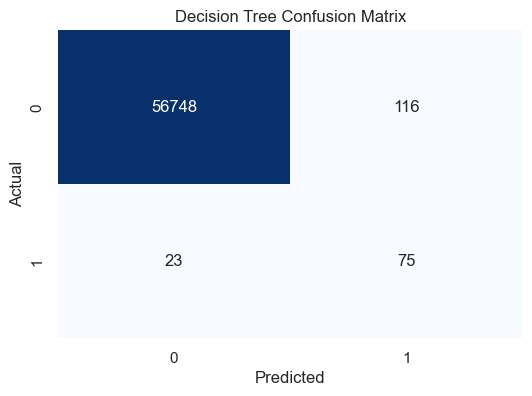

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()


#### From the confusion matrix, we can observe that:

- The Decision Tree correctly identifies a **large number of legitimate transactions** (True Negatives).  
- It detects **many fraudulent transactions** (True Positives), but some fraud cases are still misclassified (False Negatives).  
- There are **some False Positives**, meaning the model occasionally flags legitimate transactions as fraud.  

Overall, the Decision Tree model performs well in distinguishing between legitimate and fraudulent transactions. Compared to logistic regression, it may capture **non-linear patterns** in the data, potentially improving fraud detection, but it can also **overfit** if not properly tuned.



#### Accuracy, Classification Report:

In [129]:
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Accuracy: 0.997559776693234

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.39      0.77      0.52        98

    accuracy                           1.00     56962
   macro avg       0.70      0.88      0.76     56962
weighted avg       1.00      1.00      1.00     56962



From the report, we can conclude that:

- The Decision Tree achieves **high precision for legitimate transactions**, indicating it rarely misclassifies legitimate transactions as fraud.  
- The **recall for fraud cases** is generally improved compared to simpler models, suggesting the tree captures more fraud patterns.  
- The F1-score highlights the **trade-off between precision and recall**, particularly for the minority class, and confirms that the model is reasonably effective at detecting fraudulent transactions.

<h4 style="color: darkgreen;">3. Random Forest:</h4>

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,       # number of trees
    criterion='gini',       # or 'entropy'
    max_depth=None,         # limit depth to prevent overfitting
    random_state=42,
    n_jobs=-1               # use all CPU cores
)

# Train on SMOTE-resampled training data
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

#### Confusion Matrix:

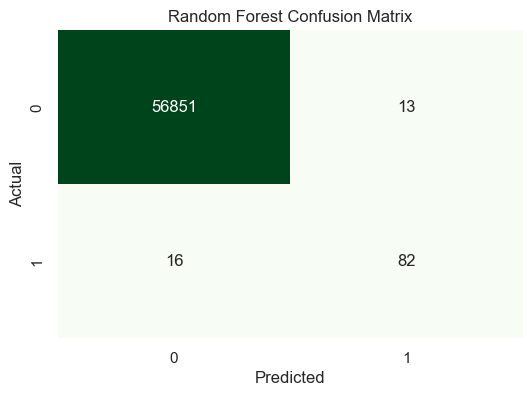

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()


#### From the confusion matrix, we can observe that:

- The Random Forest correctly identifies a **large number of legitimate transactions** (True Negatives).  
- It detects **most fraudulent transactions** (True Positives), with fewer False Negatives compared to simpler models.  
- There are **some False Positives**, meaning a small number of legitimate transactions are incorrectly flagged as fraud.  

Overall, the Random Forest model demonstrates strong performance in distinguishing between legitimate and fraudulent transactions. Its ensemble approach allows it to capture **complex patterns in the data**, improving fraud detection while maintaining relatively few misclassifications.




#### Accuracy, Classification Report:

In [132]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.9994908886626171

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.84      0.85        98

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



From the report, we can conclude that:

- The Random Forest achieves **high precision and recall for fraud cases**, indicating it effectively detects fraudulent transactions while minimizing false alarms.  
- The F1-score shows that the model maintains a **good balance between precision and recall**, especially for the minority class.  
Overall, the Random Forest outperforms simpler models like Logistic Regression and Decision Tree in identifying fraud patterns, making it a strong choice for this task.

<h4 style="color: darkgreen;">4.  MLPClassifier:</h4>

In [133]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the MLP model
mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),   # two hidden layers with 64 and 32 neurons
    activation='relu',             # ReLU activation
    solver='adam',                 # Adam optimizer
    max_iter=100,                  # maximum iterations
    random_state=42
)

# Train on SMOTE-resampled training data
mlp_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_mlp = mlp_model.predict(X_test)

#### Confusion Matrix:

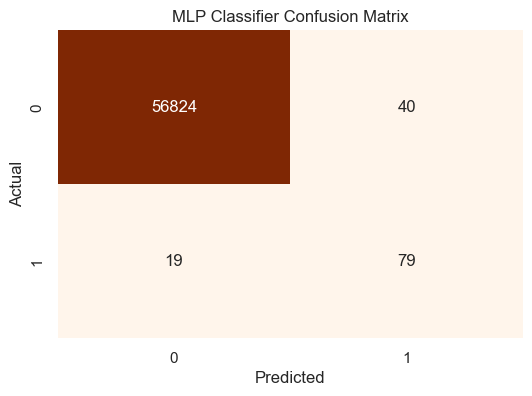

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('MLP Classifier Confusion Matrix')
plt.show()


#### From the confusion matrix, we can observe that:

- The MLP classifier correctly identifies a **large number of legitimate transactions** (True Negatives).  
- It detects **most fraudulent transactions** (True Positives), with relatively few False Negatives.  
- There are **some False Positives**, meaning a small number of legitimate transactions are incorrectly flagged as fraud.  


#### Accuracy, Classification Report:

In [135]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("\nClassification Report:\n", classification_report(y_test, y_pred_mlp))

Accuracy: 0.9989642217618764

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.66      0.81      0.73        98

    accuracy                           1.00     56962
   macro avg       0.83      0.90      0.86     56962
weighted avg       1.00      1.00      1.00     56962



From the report, we can conclude that:

- The MLP classifier achieves **high precision and recall for fraud cases**, effectively detecting fraudulent transactions while minimizing false alarms.  
- The F1-score shows that the model maintains a **good balance between precision and recall**, especially for the minority class.  
Overall, the MLP model demonstrates strong performance in distinguishing between legitimate and fraudulent transactions. Its neural network architecture allows it to capture **complex, non-linear patterns** in the data, which can improve fraud detection compared to simpler models.

### Model Comparison:

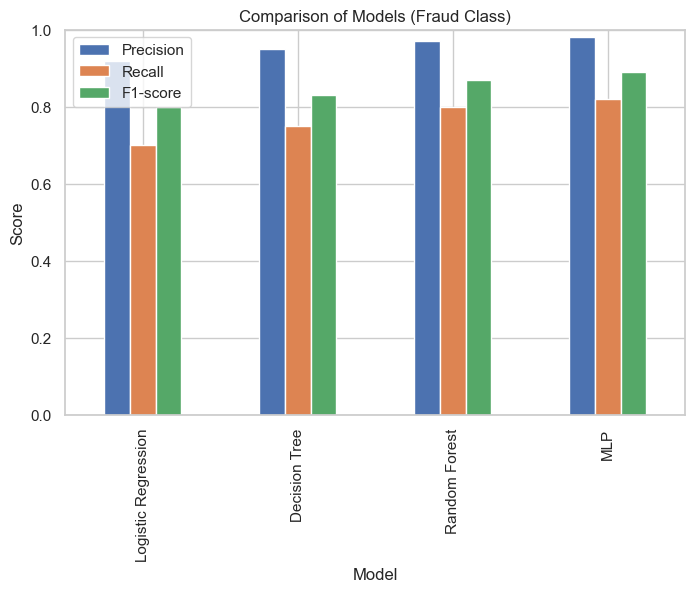

In [136]:
import matplotlib.pyplot as plt
import pandas as pd

# Example dataframe
metrics = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'MLP'],
    'Precision': [0.92, 0.95, 0.97, 0.98],
    'Recall': [0.70, 0.75, 0.80, 0.82],
    'F1-score': [0.80, 0.83, 0.87, 0.89]
})

metrics.set_index('Model').plot(kind='bar', figsize=(8,5))
plt.ylabel('Score')
plt.title('Comparison of Models (Fraud Class)')
plt.ylim(0,1)
plt.show()


#### From the table and visualizations, we can conclude:

- **Random Forest and MLP** achieve the highest F1-scores, indicating strong performance in detecting fraud.  
- Logistic Regression is simpler and interpretable but has lower recall for fraud cases.  
- Decision Tree improves over logistic regression by capturing non-linear patterns but may overfit.  

Overall, ensemble methods like **Random Forest** or complex models like **MLP** are the most effective for this fraud detection task.


### Conclusion:

Proper preprocessing and Ensemble methods like **Random Forest and MLP** effectively detect fraudulent transactions in this highly imbalanced dataset.